In [ ]:
import pandas as pd

In [ ]:
data_path = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
dataset = pd.read_csv(data_path)
display(dataset.head(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Read and analyze the PIMA Indians Diabetes dataset (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
df = pd.read_csv(url)

In [ ]:

# Display the first 5 rows of the data
print(df.head())

# Display the information about the data
print(df.info())

# Display the descriptive statistics of the data
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# Calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

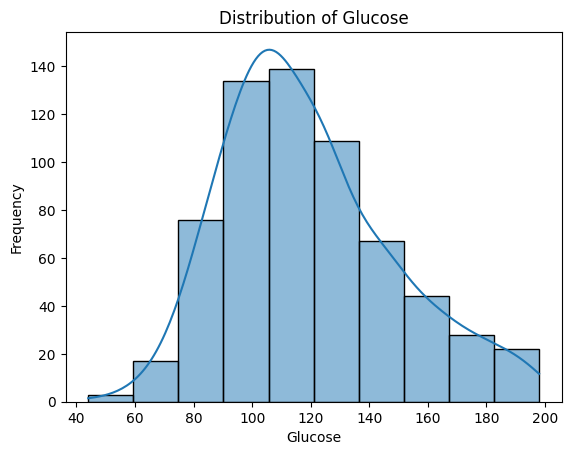

In [ ]:
sns.histplot(df["Glucose"], bins=10, kde=True)
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose")
plt.show()

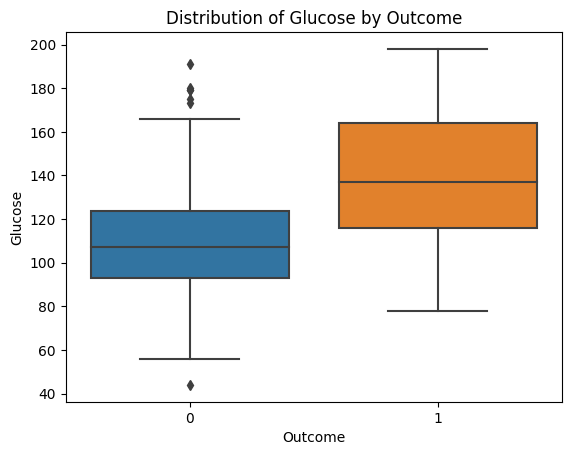

In [ ]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title("Distribution of Glucose by Outcome")
plt.show()

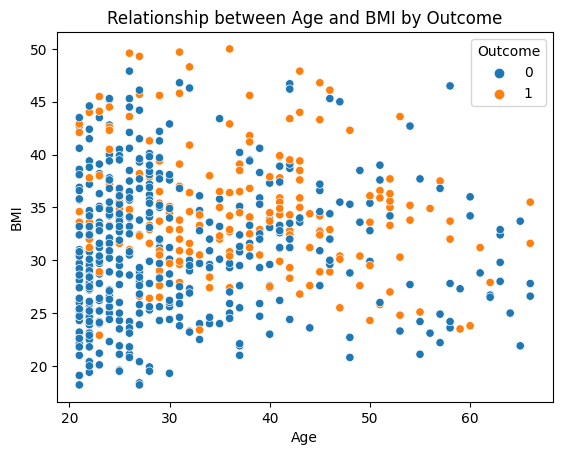

In [ ]:
sns.scatterplot(x="Age", y="BMI", data=df, hue="Outcome")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Relationship between Age and BMI by Outcome")
plt.show()

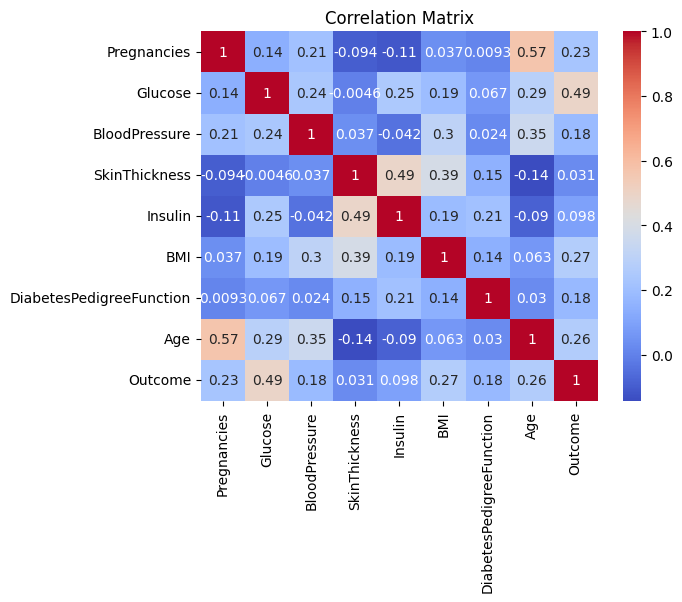

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Highly correlated pairs: []


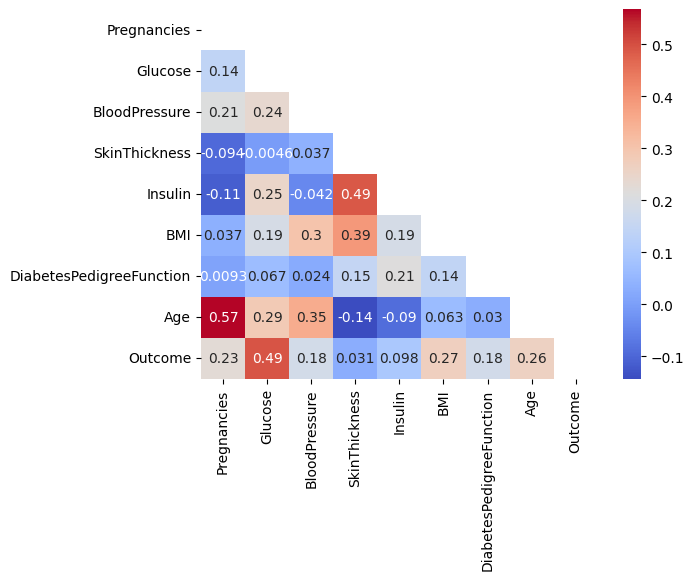

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm")

# Find the highly correlated variables
corr_threshold = 0.7
corr_pairs = [(i, j) for i in range(corr.shape[0]) for j in range(i+1, corr.shape[0]) if abs(corr.iloc[i, j]) > corr_threshold]
print("Highly correlated pairs:", corr_pairs)

# Remove one of the variables from each highly correlated pair
df = df.drop(columns=[df.columns[j] for i, j in corr_pairs])

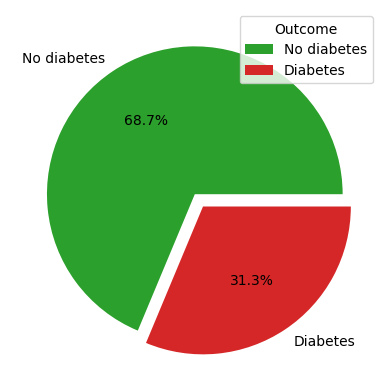

In [ ]:
# Count the number of instances in each category of the Outcome variable
outcome_counts = df['Outcome'].value_counts()

# Create a pie chart
labels = ['No diabetes', 'Diabetes']
colors = ['tab:green', 'tab:red']
explode = [0, 0.1]
plt.pie(outcome_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')

# Add a legend
plt.legend(title='Outcome', loc='upper right')

# Show the plot
plt.show()

KNN Model

Mean = 73.71 %
Standard deviation = 5.36
Confusion Matrix:
 [[102  19]
 [ 29  42]]
Accuracy = 75.00 %
Test Precision: 68.85%
Test Recall: 59.15%
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       121
           1       0.69      0.59      0.64        71

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



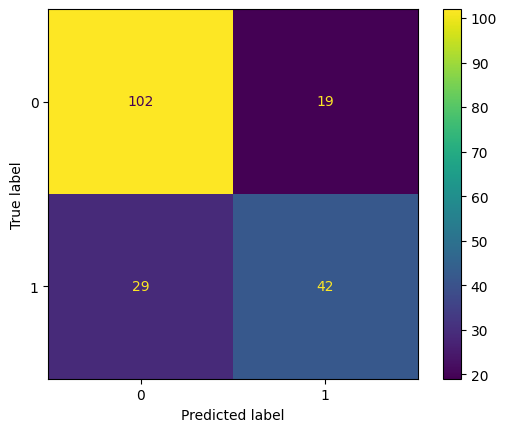

In [13]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data_path = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
dataset = read_csv(data_path)

# Split the dataset into features (X) and target variable (Y)
X = dataset.drop('Outcome', axis=1).values
Y = dataset['Outcome'].values

# Perform Z scaling on the features using StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Train a KNN classifier on the training set and perform 10-fold cross-validation
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
k_folds = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(classifier, X, Y, cv=k_folds)

# Print the mean and standard deviation of the cross-validation scores
print("Mean =", "%3.2f" % (scores.mean() * 100), "%")
print("Standard deviation =", "%3.2f" % (scores.std() * 100))

# Train the KNN classifier on the entire training set and predict the target variable on the testing set
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Compute and print the confusion matrix and accuracy score
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", confusion_mat)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy =", "%3.2f" % (accuracy * 100), "%")

# Display the confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_mat, display_labels=[0, 1])
cmd.plot()

# Compute and print the precision and recall scores
precision = precision_score(y_true=Y_test, y_pred=Y_pred)
recall = recall_score(y_true=Y_test, y_pred=Y_pred)
print("Test Precision: {}%".format(round(precision * 100, 2)))
print("Test Recall: {}%".format(round(recall * 100, 2)))

# Display the classification report
print(classification_report(Y_test, Y_pred))


Logistic Regression dropping missing values and outliers

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the dataset and drop rows with missing values
data_path = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
df = pd.read_csv(data_path)
df.dropna(inplace=True)

# Remove outliers
df = df[(np.abs(df.Outcome-df.Outcome.mean()) <= (3*df.Outcome.std()))]

# Split the dataset into training and testing data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))


Accuracy: 0.753
Precision: 0.649
Recall: 0.673


Logistic Regression with missing values and outliers

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
df = pd.read_csv(data_path)

# Split the dataset into training and testing data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
score = clf.score(X_test, y_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))


Accuracy: 0.753
Precision: 0.649
Recall: 0.673


Check for maximum performance metrics using ROC-AUC value and Matthew's correlation coefficient

for the KNN model

Mean = 72.66 %
Standard deviation = 5.16
Confusion Matrix:
 [[103  19]
 [ 31  39]]
Accuracy = 73.96 %
Test Precision: 67.24%
Test Recall: 55.71%
ROC-AUC = 70.07 %
Matthew's correlation coefficient = 0.4207706917268619


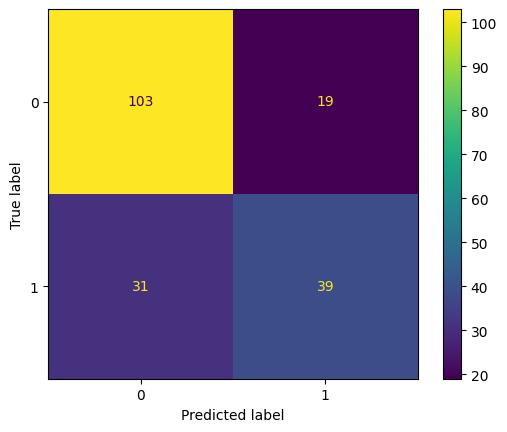

In [28]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, classification_report, roc_auc_score, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data_path = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
dataset = read_csv(data_path)

# Split the dataset into features (X) and target variable (Y)
X = dataset.drop('Outcome', axis=1).values
Y = dataset['Outcome'].values

# Perform Z scaling on the features using StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Train a KNN classifier on the training set and perform 10-fold cross-validation
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
k_folds = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(classifier, X, Y, cv=k_folds)

# Print the mean and standard deviation of the cross-validation scores
print("Mean =", "%3.2f" % (scores.mean() * 100), "%")
print("Standard deviation =", "%3.2f" % (scores.std() * 100))

# Train the KNN classifier on the entire training set and predict the target variable on the testing set
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Compute and print the confusion matrix and accuracy score
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", confusion_mat)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy =", "%3.2f" % (accuracy * 100), "%")

# Display the confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_mat, display_labels=[0, 1])
cmd.plot()

# Compute and print the precision and recall scores
precision = precision_score(y_true=Y_test, y_pred=Y_pred)
recall = recall_score(y_true=Y_test, y_pred=Y_pred)
print("Test Precision: {}%".format(round(precision * 100, 2)))
print("Test Recall: {}%".format(round(recall * 100, 2)))

# Compute and print the ROC-AUC value
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC =", "%3.2f" % (roc_auc * 100), "%")

# Compute and print the Matthew's correlation coefficient value
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthew's correlation coefficient =", mcc)


for Logistic Regression Model

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = "https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/PIMA/diabetes.csv"
df = pd.read_csv(data_path)

# Split the dataset into training and testing data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] # predicted probabilities of class 1

# Evaluate the model
score = clf.score(X_test, y_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate ROC-AUC and MCC
roc_auc = roc_auc_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("ROC-AUC:", round(roc_auc, 3))
print("MCC:", round(mcc, 3))

Accuracy: 0.729
Precision: 0.616
Recall: 0.652
ROC-AUC: 0.794
MCC: 0.42
